# PROYECTO 2

## Identificar necesidades análiticas
De las reuniones con los estudiantes de medicina pudimos dialogar y entender las necesidades de análisis que tienen, las cuales se resumen en la siguiente pregunta: **¿Cual es la prevalencia de asma en las diferentes UPZ de la ciudad de Bogota de acuerdo con las caracteristicas de la vivienda?**

Una vez entendido que nuestro cliente desea saber la relación de las condiciones de vida de las personas con Asma, procedemos a definir 4 requerimientos analiticos que nos puedan llegar a una aproximación de la respuesta a la pregunta anterior:
1. **Impacto de las caracteristicas de vivienda en la prevalencia de asma.** Para este requeriemiento se busca analizar principalmente el tema de humedad y grietas en las viviendas. Esto porque en la investigación y charla realizados pudimos identificar que estos son factores desencadenantes del asma.
https://www.cdc.gov/asthma/es/triggers.html
2. **Impacto del entorno en la prevalencia del asma.** Este requerimiento es fundamental para identificar la relación que hay entre el entorno y las condiciones de de vivienda de las personas. Por lo que las principales variables a analizar son la cercania a fabricas, basureros, bares, etc.
3. **Impacto de las problematicas ambientales en la prevalencia del asma.** Este requerimiento nos permite identificar la relación que hay entre las problematicas ambientales y las condiciones de de vivienda de las personas. Por lo que las principales variables a analizar la percepcion de la calidad del aire, la presencia de insectos, presencia de malos olores, contaminación de cuerpos de agua, etc.
4. **Impacto de la localización en la prevalencia del asma.** Este requerimiento nos va a permitir identificar cuales son las UPZ con mayor cantidad de casos de asma registrados, para poder identificar si hay alguna relación con las variables analizadas en los requerimientos anteriores.


## Modelar el Data Marts
Para poder responder a los requerimientos analiticos definidos anteriormente, se procede a modelar los Data Marts que nos permitan responder a dos de estos requerimientos que le presentaremos al cliente. Para esto se realiza un analisis de las variables que se encuentran en el dataset, y se seleccionan las que son relevantes para cada uno de los requerimientos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_asma_2017 = pd.read_csv('./data/Asma_2017.csv')
df_noAsma_2017 = pd.read_csv('./data/noAsma_2017.csv')
df_asma_2021 = pd.read_csv('./data/Asma_2021.csv', encoding='utf-8', encoding_errors='ignore')
df_noAsma_2021 = pd.read_csv('./data/noAsma_2021.csv', encoding='utf-8', encoding_errors='ignore')

C:\Users\jm200\AppData\Local\Temp\ipykernel_26892\3907248362.py:1: DtypeWarning: Columns (145,295,297,380,381,383,469,495,496,499,500,501,508,509,510,511) have mixed types. Specify dtype option on import or set low_memory=False.
  df_asma_2017 = pd.read_csv('./data/Asma_2017.csv')
C:\Users\jm200\AppData\Local\Temp\ipykernel_26892\3907248362.py:2: DtypeWarning: Columns (12,145,146,147,280,285,295,296,297,304,379,380,381,382,383,469,470,495,496,498,499,500,501,507,508,509,510,511,512,513) have mixed types. Specify dtype option on import or set low_memory=False.
  df_noAsma_2017 = pd.read_csv('./data/noAsma_2017.csv')
C:\Users\jm200\AppData\Local\Temp\ipykernel_26892\3907248362.py:3: DtypeWarning: Columns (334,410,412,540,541,543,545,549,552,553,554,555,556,557) have mixed types. Specify dtype option on import or set low_memory=False.
  df_asma_2021 = pd.read_csv('./data/Asma_2021.csv', encoding='utf-8', encoding_errors='ignore')
C:\Users\jm200\AppData\Local\Temp\ipykernel_26892\390724836

De los datos cargados, gracias al analisis realizado y la investigacion dentro del diccionario proporcionado, se identificaron las siguientes variables que son relevantes para los requerimientos analiticos a realizar:
* "NVCBP8A","NVCBP8B", "NVCBP8D","NVCBP8C","NVCBP8E", "NVCBP8F", "NVCBP8G", "NVCBP12", "NVCBP13", "NVCBP14A", "NVCBP14B", "NVCBP14C", "NVCBP14D", "NVCBP14E", "NVCBP14F", "NVCBP14G", "NVCBP14H", "NVCBP14I", "NVCBP14J", "NVCBP14K", "NVCBP15D", "NVCBP15E", "NVCBP15F", "NVCBP15H", "NPCEP16AB", "NPCEP4","NPCEP5","NVCBP11AA" los cuales hacen referencia a las siguientes definiciones de preguntas: "humedad_techo_paredes", "goteras", "fallas_tuberia", "grietas_techo_paredes", "grietas_piso", "tejas_mal_estado","ventilacion ,"material_exteriores", "material_pisos", "fabricas_c","basureros_c", "plazas_c", "terminal_c", "bares_c", "ollas_c", "lotes_oscuros_c", "central_e_c", "canos_c", "incendio_c", "talleres_c", "contaminacion_aire","malos_olores", "mal_uso_basuras","animales_molestos","localidad", "edad", "sexo", "estrato" respectivamente.

Hay que tener en cuenta que como deseamos saber los datos de las UPZ, debemos no usar los datos del 2017 ya que no cuentan condicha informacion.

In [3]:
df_2017 = pd.concat([df_asma_2017, df_noAsma_2017])
df_2017.rename(columns={'NPCFP14I': 'asma'}, inplace=True)

df_2021 = pd.concat([df_asma_2021, df_noAsma_2021])
df_2021.rename(columns={'NPCFP14F': 'asma'}, inplace=True)

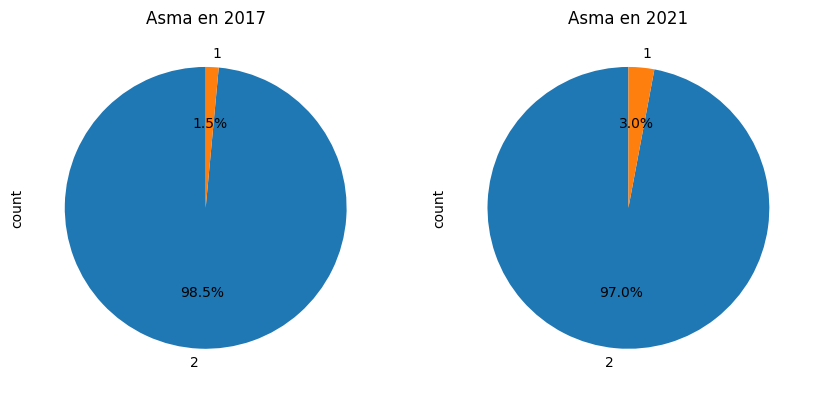

In [4]:
fig, ax = plt.subplots(1,2 , figsize=(10, 5))
df_2017['asma'].value_counts().plot.pie(ax=ax[0],autopct='%1.1f%%', startangle=90)
df_2021['asma'].value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%', startangle=90)
ax[0].set_title('Asma en 2017')
ax[1].set_title('Asma en 2021')
plt.show()

Ahora comenzaremos a modelar el Data Marts del ETL que se encuentra en la carpeta data bajo el nombre "modeloDim.png"

In [5]:
# Primero realizar la tabla de pregunta
df_pregunta = pd.DataFrame({'PK_Pregunta': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],
                            'Descripcion': ["humedad_techo_paredes", "goteras", "fallas_tuberia", "grietas_techo_paredes", "grietas_piso", "tejas_mal_estado","ventilacion" ,"material_exteriores", "material_pisos", "fabricas_c","basureros_c", "plazas_c", "terminal_c", "bares_c", "ollas_c", "lotes_oscuros_c", "central_e_c", "canos_c", "incendio_c", "talleres_c", "contaminacion_aire","malos_olores", "mal_uso_basuras","animales_molestos"]})

df_pregunta

,PK_Pregunta,Descripcion
0,1,humedad_techo_paredes
1,2,goteras
2,3,fallas_tuberia
3,4,grietas_techo_paredes
4,5,grietas_piso
5,6,tejas_mal_estado
6,7,ventilacion
7,8,material_exteriores
8,9,material_pisos
9,10,fabricas_c


In [6]:
df_2017 = df_2017[["NVCBP8A","NVCBP8B", "NVCBP8D","NVCBP8C","NVCBP8E", "NVCBP8F", "NVCBP8G", "NVCBP12", "NVCBP13", "NVCBP14A", "NVCBP14B", "NVCBP14C", "NVCBP14D", "NVCBP14E", "NVCBP14F", "NVCBP14G", "NVCBP14H", "NVCBP14I", "NVCBP14J", "NVCBP14K", "NVCBP15D", "NVCBP15E", "NVCBP15F", "NVCBP15H", "NPCEP16AB", "asma", "NPCEP4","NPCEP5","NVCBP11AA"]]
# Ahora escogeremos las variables de los data frames que vamos a utiilzar
df_2021 = df_2021[["NVCBP8A","NVCBP8B", "NVCBP8D","NVCBP8C","NVCBP8E", "NVCBP8F", "NVCBP8G", "NVCBP12", "NVCBP13", "NVCBP14A", "NVCBP14B", "NVCBP14C", "NVCBP14D", "NVCBP14E", "NVCBP14F", "NVCBP14G", "NVCBP14H", "NVCBP14I", "NVCBP14J", "NVCBP14K", "NVCBP15D", "NVCBP15E", "NVCBP15F", "NVCBP15H", "NPCEP16AB", "asma", "NPCEP4","NPCEP5","NVCBP11AA"]]

# Ahora vamos a cambiar los valores de las variables para que sean mas entendibles
df_2017.rename(columns={"NVCBP8A": "humedad_techo_paredes", "NVCBP8B": "goteras", "NVCBP8D": "fallas_tuberia", "NVCBP8C": "grietas_techo_paredes", "NVCBP8E": "grietas_piso", "NVCBP8F": "tejas_mal_estado", "NVCBP8G": "ventilacion","NVCBP12": "material_exteriores", "NVCBP13": "material_pisos","NVCBP14A": "fabricas_c", "NVCBP14B": "basureros_c", "NVCBP14C": "plazas_c", "NVCBP14D": "terminal_c", "NVCBP14E": "bares_c", "NVCBP14F": "ollas_c", "NVCBP14G": "lotes_oscuros_c", "NVCBP14H": "central_e_c", "NVCBP14I": "canos_c", "NVCBP14J": "incendio_c", "NVCBP14K": "talleres_c", "NVCBP15D": "contaminacion_aire", "NVCBP15E": "malos_olores", "NVCBP15F": "mal_uso_basuras", "NVCBP15H": "animales_molestos", "NPCEP16AB": "localidad","NPCEP4": 'edad',"NPCEP5": 'sexo',"NVCBP11AA": 'estrato'}, inplace=True)
df_2017['anio'] = 2017
df_2021.rename(columns={"NVCBP8A": "humedad_techo_paredes", "NVCBP8B": "goteras", "NVCBP8D": "fallas_tuberia", "NVCBP8C": "grietas_techo_paredes", "NVCBP8E": "grietas_piso", "NVCBP8F": "tejas_mal_estado", "NVCBP8G": "ventilacion","NVCBP12": "material_exteriores", "NVCBP13": "material_pisos","NVCBP14A": "fabricas_c", "NVCBP14B": "basureros_c", "NVCBP14C": "plazas_c", "NVCBP14D": "terminal_c", "NVCBP14E": "bares_c", "NVCBP14F": "ollas_c", "NVCBP14G": "lotes_oscuros_c", "NVCBP14H": "central_e_c", "NVCBP14I": "canos_c", "NVCBP14J": "incendio_c", "NVCBP14K": "talleres_c", "NVCBP15D": "contaminacion_aire", "NVCBP15E": "malos_olores", "NVCBP15F": "mal_uso_basuras", "NVCBP15H": "animales_molestos", "NPCEP16AB": "localidad", "NPCEP4": 'edad',"NPCEP5": 'sexo',"NVCBP11AA": 'estrato'}, inplace=True)
df_2021['anio'] = 2021

df_complete= df_2021
df_complete

,humedad_techo_paredes,goteras,fallas_tuberia,grietas_techo_paredes,grietas_piso,tejas_mal_estado,ventilacion,material_exteriores,material_pisos,fabricas_c,...,contaminacion_aire,malos_olores,mal_uso_basuras,animales_molestos,localidad,asma,edad,sexo,estrato,anio
0,2,2,2,2,2,2,2,1,4,2,...,2,2,2,2,NaN,1,70,2,2.0,2021
1,1,1,2,2,2,2,2,1,4,2,...,2,2,2,2,NaN,1,60,2,2.0,2021
2,2,2,2,2,2,2,2,1,4,1,...,1,1,2,1,NaN,1,13,1,2.0,2021
3,2,2,2,2,2,2,2,1,4,1,...,2,1,2,1,NaN,1,38,1,2.0,2021
4,1,2,2,2,2,2,2,1,4,1,...,1,1,2,1,NaN,1,56,2,2.0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283646,2,2,2,2,2,2,2,1,4,2,...,2,2,2,2,NaN,2,46,2,1.0,2021
283647,2,2,2,2,2,2,2,1,4,2,...,2,2,2,2,NaN,2,46,2,1.0,2021
283648,2,2,2,2,2,2,2,1,4,2,...,2,2,2,2,NaN,2,27,1,2.0,2021
283649,2,2,2,2,2,2,2,1,4,2,...,2,2,2,2,NaN,2,23,2,2.0,2021


In [7]:
df_complete = df_complete.replace({'material_exteriores': {1:4,2:5,3:6,4:7,5:8,6:9,7:10,8:11,9:12}})
df_complete = df_complete.replace({'material_pisos': {1:13,2:14,3:15,4:16,5:17,6:18,7:19}})
df_complete['FK_Persona'] = df_complete.index + 1
df_complete

,humedad_techo_paredes,goteras,fallas_tuberia,grietas_techo_paredes,grietas_piso,tejas_mal_estado,ventilacion,material_exteriores,material_pisos,fabricas_c,...,malos_olores,mal_uso_basuras,animales_molestos,localidad,asma,edad,sexo,estrato,anio,FK_Persona
0,2,2,2,2,2,2,2,4,16,2,...,2,2,2,NaN,1,70,2,2.0,2021,1
1,1,1,2,2,2,2,2,4,16,2,...,2,2,2,NaN,1,60,2,2.0,2021,2
2,2,2,2,2,2,2,2,4,16,1,...,1,2,1,NaN,1,13,1,2.0,2021,3
3,2,2,2,2,2,2,2,4,16,1,...,1,2,1,NaN,1,38,1,2.0,2021,4
4,1,2,2,2,2,2,2,4,16,1,...,1,2,1,NaN,1,56,2,2.0,2021,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283646,2,2,2,2,2,2,2,4,16,2,...,2,2,2,NaN,2,46,2,1.0,2021,283647
283647,2,2,2,2,2,2,2,4,16,2,...,2,2,2,NaN,2,46,2,1.0,2021,283648
283648,2,2,2,2,2,2,2,4,16,2,...,2,2,2,NaN,2,27,1,2.0,2021,283649
283649,2,2,2,2,2,2,2,4,16,2,...,2,2,2,NaN,2,23,2,2.0,2021,283650


In [8]:
df_complete = pd.melt(df_complete, id_vars=['FK_Persona', 'anio', 'localidad', 'asma', 'edad', 'sexo', 'estrato'], value_vars=['humedad_techo_paredes', 'goteras', 'fallas_tuberia', 'grietas_techo_paredes', 'grietas_piso', 'tejas_mal_estado', 'material_exteriores', 'material_pisos', 'fabricas_c', 'basureros_c', 'plazas_c', 'terminal_c', 'bares_c', 'ollas_c', 'lotes_oscuros_c', 'central_e_c', 'canos_c', 'incendio_c', 'talleres_c', 'contaminacion_aire', 'malos_olores', 'mal_uso_basuras', 'animales_molestos'], var_name='FK_Pregunta', value_name='FK_TipoRespuesta')
df_complete

,FK_Persona,anio,localidad,asma,edad,sexo,estrato,FK_Pregunta,FK_TipoRespuesta
0,1,2021,NaN,1,70,2,2.0,humedad_techo_paredes,2
1,2,2021,NaN,1,60,2,2.0,humedad_techo_paredes,1
2,3,2021,NaN,1,13,1,2.0,humedad_techo_paredes,2
3,4,2021,NaN,1,38,1,2.0,humedad_techo_paredes,2
4,5,2021,NaN,1,56,2,2.0,humedad_techo_paredes,1
...,...,...,...,...,...,...,...,...,...
6722458,283647,2021,NaN,2,46,2,1.0,animales_molestos,2
6722459,283648,2021,NaN,2,46,2,1.0,animales_molestos,2
6722460,283649,2021,NaN,2,27,1,2.0,animales_molestos,2
6722461,283650,2021,NaN,2,23,2,2.0,animales_molestos,2


In [9]:
df_complete.rename(columns={"anio": "FK_Fecha"}, inplace=True)

In [10]:
df_complete.replace({'FK_Fecha': {2017: 1, 2021: 2}}, inplace=True)
df_fecha = pd.DataFrame({'PK_Fecha': [1, 2], 'Anio': [2017, 2021]})
df_fecha

,PK_Fecha,Anio
0,1,2017
1,2,2021


In [11]:
dict_localidad = {}

dict_localidad["15"] = "ANTONIO NARIÑO"
dict_localidad["12"] = "BARRIOS UNIDOS"
dict_localidad["7"] = "BOSA"
dict_localidad["02"] = "CHAPINERO"
dict_localidad["19"] = "CIUDAD BOLIVAR"
dict_localidad["10"] = "ENGATIVÁ"
dict_localidad["9"] = "FONTIBÓN"
dict_localidad["08"] = "KENNEDY"
dict_localidad["17"] = "LA CANDELARIA"
dict_localidad["14"] = "LOS MÁRTIRES"
dict_localidad["16"] = "PUENTE ARANDA"
dict_localidad["18"] = "RAFAEL URIBE URIBE"
dict_localidad["4"] = "SAN CRISTOBAL"
dict_localidad["3"] = "SANTAFÉ"
dict_localidad["11"] = "SUBA"
dict_localidad["13"] = "TEUSAQUILLO"
dict_localidad["6"] = "TUNJUELITO"
dict_localidad["1"] = "USAQUÉN"
dict_localidad["5"] = "USME"
dict_localidad["20"] = "SUMAPAZ"
dict_localidad["99"] = "NO SABE"

# Change string key to float key
dict_localidad = {float(k): v for k, v in dict_localidad.items()}
df_complete['localidad'] = df_complete['localidad'].replace(dict_localidad)
df_complete.head()
df_complete["localidad"].value_counts()

df_complete

,FK_Persona,FK_Fecha,localidad,asma,edad,sexo,estrato,FK_Pregunta,FK_TipoRespuesta
0,1,2,NaN,1,70,2,2.0,humedad_techo_paredes,2
1,2,2,NaN,1,60,2,2.0,humedad_techo_paredes,1
2,3,2,NaN,1,13,1,2.0,humedad_techo_paredes,2
3,4,2,NaN,1,38,1,2.0,humedad_techo_paredes,2
4,5,2,NaN,1,56,2,2.0,humedad_techo_paredes,1
...,...,...,...,...,...,...,...,...,...
6722458,283647,2,NaN,2,46,2,1.0,animales_molestos,2
6722459,283648,2,NaN,2,46,2,1.0,animales_molestos,2
6722460,283649,2,NaN,2,27,1,2.0,animales_molestos,2
6722461,283650,2,NaN,2,23,2,2.0,animales_molestos,2


In [12]:
df_complete.replace({"FK_Pregunta": {"humedad_techo_paredes": 1, "goteras": 2, "fallas_tuberia": 3, "grietas_techo_paredes": 4, "grietas_piso": 5, "tejas_mal_estado": 6, "ventilacion": 7,"material_exteriores": 8, "material_pisos": 9, "fabricas_c": 10, "basureros_c": 11, "plazas_c": 12, "terminal_c": 13, "bares_c": 14, "ollas_c": 15, "lotes_oscuros_c": 16, "central_e_c": 17, "canos_c": 18, "incendio_c": 19, "talleres_c": 20, "contaminacion_aire": 21, "malos_olores": 22, "mal_uso_basuras": 23, "animales_molestos": 24}}, inplace=True)
df_complete

,FK_Persona,FK_Fecha,localidad,asma,edad,sexo,estrato,FK_Pregunta,FK_TipoRespuesta
0,1,2,NaN,1,70,2,2.0,1,2
1,2,2,NaN,1,60,2,2.0,1,1
2,3,2,NaN,1,13,1,2.0,1,2
3,4,2,NaN,1,38,1,2.0,1,2
4,5,2,NaN,1,56,2,2.0,1,1
...,...,...,...,...,...,...,...,...,...
6722458,283647,2,NaN,2,46,2,1.0,24,2
6722459,283648,2,NaN,2,46,2,1.0,24,2
6722460,283649,2,NaN,2,27,1,2.0,24,2
6722461,283650,2,NaN,2,23,2,2.0,24,2


In [13]:
# Ahora creamos la tabla de persona
df_persona = df_complete[['edad', 'sexo' ,'estrato']]
df_persona.rename(columns={"FK_Persona": "PK_Persona"}, inplace=True)
df_persona['PK_Persona'] = df_persona.index + 1
df_persona = df_persona.replace({'sexo': {1: 'M', 2: 'F', 3: 'IS'}})
df_persona

C:\Users\jm200\AppData\Local\Temp\ipykernel_26892\846436445.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_persona.rename(columns={"FK_Persona": "PK_Persona"}, inplace=True)
C:\Users\jm200\AppData\Local\Temp\ipykernel_26892\846436445.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_persona['PK_Persona'] = df_persona.index + 1


,edad,sexo,estrato,PK_Persona
0,70,F,2.0,1
1,60,F,2.0,2
2,13,M,2.0,3
3,38,M,2.0,4
4,56,F,2.0,5
...,...,...,...,...
6722458,46,F,1.0,6722459
6722459,46,F,1.0,6722460
6722460,27,M,2.0,6722461
6722461,23,F,2.0,6722462


In [14]:
# Ahora creamos la tabla de tipoPregunta para obtener la respuesta
df_tipo = df_complete[['FK_TipoRespuesta']]
df_tipo = df_tipo.drop_duplicates()
df_tipo.rename(columns={"FK_TipoRespuesta": "PK_TipoRespuesta"}, inplace=True)
df_tipo

,PK_TipoRespuesta
0,2
1,1
27,9
1753686,4
1753714,5
1753835,7
1753994,6
1754489,11
1755629,8
1847184,10


In [15]:
dictT = {1: "Si", 2: "No", 99: "No sabe/ No responde", 4:"Bloque, ladrillo, piedra, madera pulida", 5: "Tapia pisada, adobe", 6: "Bahareque revocado", 7:"Bahareque sin revocar", 8:"Madera burda, tabla, tablón", 9:"Material prefabricado", 10:"Guadua, caña, esterilla, otro vegetal", 11:"Zinc, tela, lona, cartón, latas, desechos, plástico", 12:"Sin paredes", 13:"Alfombra o tapete de pared a pared", 14:"Madera pulida y lacada, parqué", 15: "Mármol", 16:"Baldosa, vinilo, tableta, ladrillo, laminado o flotante", 17: "Madera burda, tabla o tablón, otro vegetal", 18:"Cemento, gravilla", 19:"Tierra, arena"}
for index, row in df_tipo.iterrows():
    nueva_columna = dictT[row['PK_TipoRespuesta']]
    df_tipo.loc[index, 'significado'] = nueva_columna

nuva_fila = {'PK_TipoRespuesta': 99, 'significado': 'No sabe/ No responde'}
df_tipo.loc[len(df_tipo.index)] = nuva_fila
df_tipo

,PK_TipoRespuesta,significado
0,2,No
1,1,Si
27,9,Material prefabricado
1753686,4,"Bloque, ladrillo, piedra, madera pulida"
1753714,5,"Tapia pisada, adobe"
1753835,7,Bahareque sin revocar
1753994,6,Bahareque revocado
1754489,11,"Zinc, tela, lona, cartón, latas, desechos, plá..."
1755629,8,"Madera burda, tabla, tablón"
1847184,10,"Guadua, caña, esterilla, otro vegetal"


In [16]:
df_complete = df_complete.drop(['edad', 'sexo', 'estrato'], axis=1)

In [17]:
#Ahora exportamos los dataframes a csv
df_persona.to_csv('./data/ETL/persona.csv', index=False)
df_fecha.to_csv('./data/ETL/fecha.csv', index=False)
df_tipo.to_csv('./data/ETL/tipoPregunta.csv', index=False)
df_pregunta.to_csv('./data/ETL/pregunta.csv', index=False)
df_complete.to_csv('./data/ETL/fact_table.csv', index=False)